##Fashon-mnist autoencoders

In [ ]:
from keras.layers import Dense
from keras.layers import Input
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
from numpy import argmax, array_equal
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Model
from imgaug import augmenters
from random import randint

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
##Loading Dataset
train = pd.read_csv("/content/fashion-mnist_test.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

***Normalize and reshape the predictors***

In [ ]:
train_x = train_x / 255

***Creating train and validation datasets***

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

***Reshape the inputs***

In [ ]:
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

***Autoencoder architecture***

***Input layer***

In [ ]:
input_layer = Input(shape=(784,))


***Encoding architecture***

In [ ]:
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1200, activation='relu')(encode_layer1)
encode_layer3 = Dense(900, activation='relu')(encode_layer2)
encode_layer4 = Dense(600, activation='relu')(encode_layer3)


***Latent view***

In [ ]:
latent_view   = Dense(10, activation='relu')(encode_layer4)

***Decoding architecture***

In [ ]:

decode_layer1 = Dense(600, activation='relu')(latent_view)
decode_layer2 = Dense(900, activation='relu')(decode_layer1)
decode_layer3 = Dense(1200, activation='relu')(decode_layer2)
decode_layer4 = Dense(1500, activation='relu')(decode_layer3)


***Output layer***

In [ ]:
output_layer  = Dense(784)(decode_layer4)
model = Model(input_layer, output_layer)

***Summary***

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 1200)              1801200   
                                                                 
 dense_2 (Dense)             (None, 900)               1080900   
                                                                 
 dense_3 (Dense)             (None, 600)               540600    
                                                                 
 dense_4 (Dense)             (None, 10)                6010      
                                                                 
 dense_5 (Dense)             (None, 600)               6600  

***Compiling and fitting***

In [ ]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.2083 - val_loss: nan
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.1948 - val_loss: nan
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.1371 - val_loss: nan
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.1476 - val_loss: nan
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.1367 - val_loss: nan
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.0905 - val_loss: nan
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.2290 - val_loss: nan
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.0907 - val_loss: nan
Epoch 9/20
1/1 [==============================] - 2s 2s/step - loss: 0.1388 - val_loss: nan
Epoch 10/20
1/1 [==============================] - 3s 3s/step - loss: 0.1610 - val_loss: nan
Epoch 10: early stopping


***Predictions on validation data***

In [ ]:
preds = model.predict(val_x)

***Plotting***

***Inputs: Actual Images***

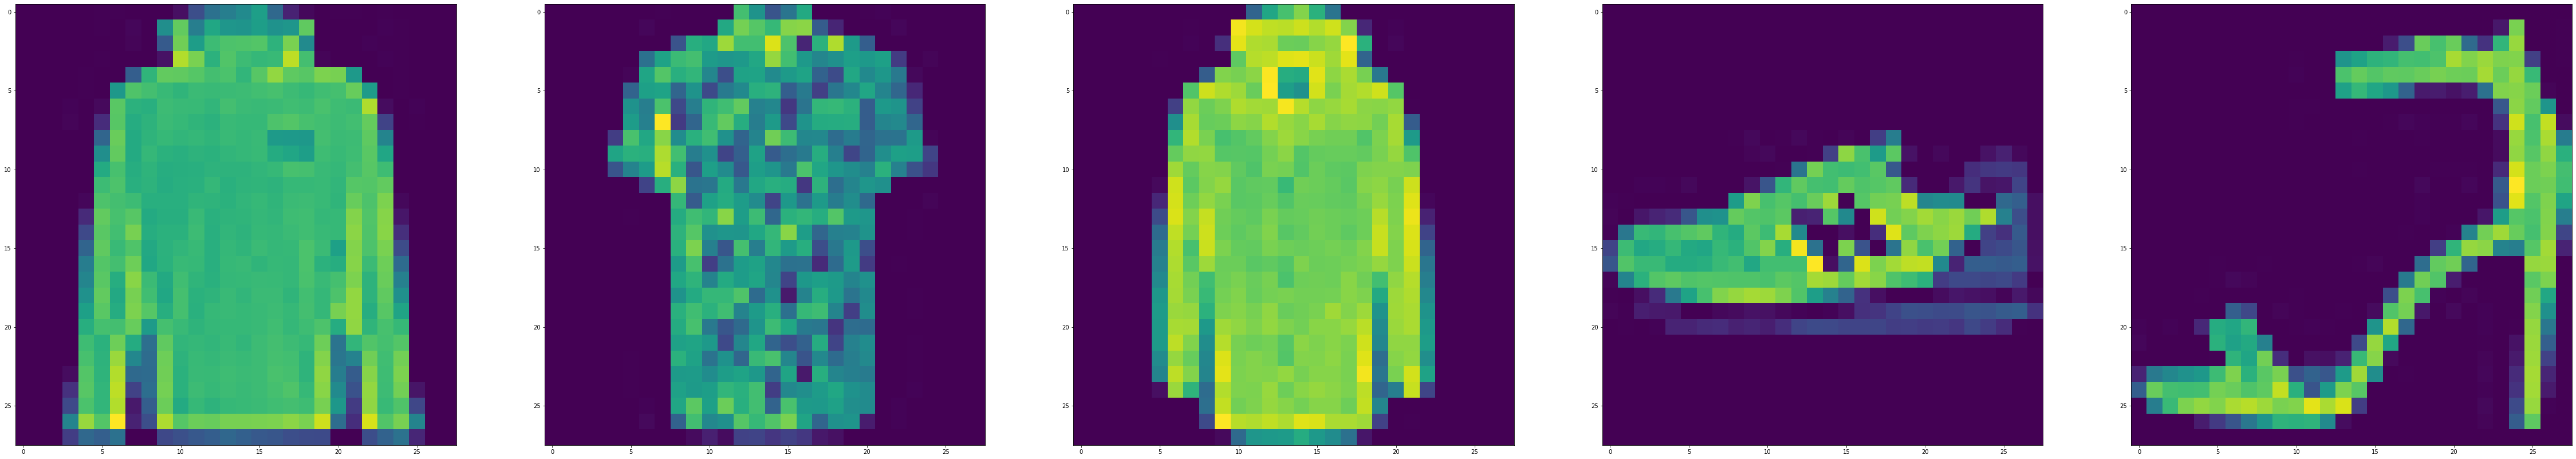

In [ ]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

***Predicted : Autoencoder Output***

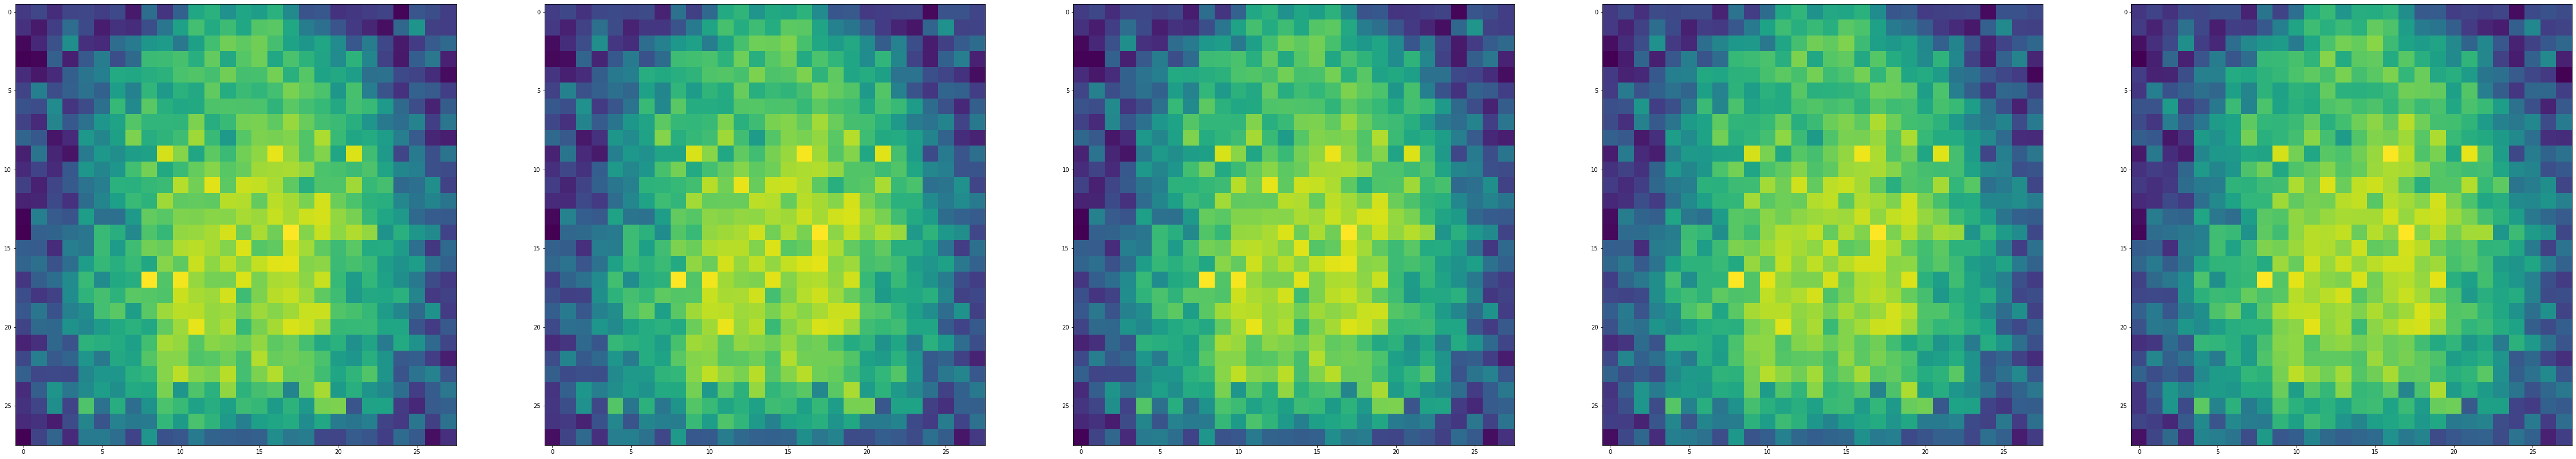

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()